# Project: Titanic - Machine Learning from Disater

In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
#Check columns: train_df
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#check columns: testdf
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### NOTES:
- `SibSp` : of siblings / spouse aboard the Titanic (anh / chị / em / vợ / chồng trên tàu)
- `Parch` : of parent / children aboard the Titanic (cha / mẹ / con / cái trên tàu)
- `Ticket` : ticket number (vé số)
- `Cabin` : Cabin number

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df = pd.read_csv('test.csv', index_col = 'PassengerId')
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1. Feature Classification: Categorical vs Numerical
(Phân loại tính năng: Phân loại và số)
- This helps use select the appropriate piots for visualization
(Điều này giúp sử dụng lựa chọn các điểm thích hợp để trực quan hóa)

Which feature are categorical ?
- Categorical Feature: `nomninal`, `ordinal`, `ratio`, `interval`
- To class the sameples into sets of similar samples

Which feature are numerical ?
- Numerical feature: `discrete`, `continuous` or `timeserise`
- These values change from sample to sample

#### Dịch:
Tính năng nào được phân loại?
- Tính năng phân loại: `danh nghĩa`, `thứ tự`, `tỷ lệ`, `khoảng`
- Phân loại các mẫu giống thành các tập mẫu giống nhau

Đặc điểm nào là số?
- Đặc tính số: `rời rạc`, `liên tục` hoặc `timeserise`
- Các giá trị này thay đổi từ mẫu này sang mẫu khác

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [12]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [13]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


In [15]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert_cat(df, features):
    for fe in features:
        df[fe] = df[fe].astype('category')
        
convert_cat(train_df,features)
convert_cat(test_df, features)


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 48.3+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age       332 non-null    float64 
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Ticket    418 non-null    object  
 7   Fare      417 non-null    float64 
 8   Cabin     91 non-null     object  
 9   Embarked  418 non-null    category
dtypes: category(5), float64(2), object(3)
memory usage: 22.7+ KB


#### Distribution of Numerical feature values across the samples

In [19]:
train_df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


#### Distribution of Categorical features

In [21]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## P2

In [23]:
train_df = pd.read_csv('train.csv', index_col=['PassengerId'])
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)
### Correlating categorical features
+ Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`, `SibSp`, `Parch`

#### Target Variable: `Survired`

In [25]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [26]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

### `Sex`

In [29]:
train_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


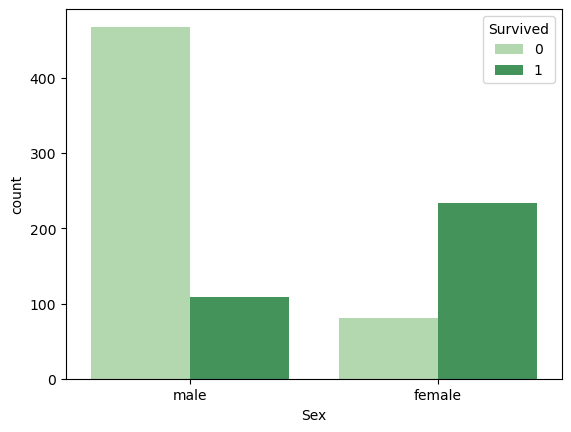

In [30]:
sns.countplot(data= train_df, x='Sex',hue='Survived', palette='Greens');

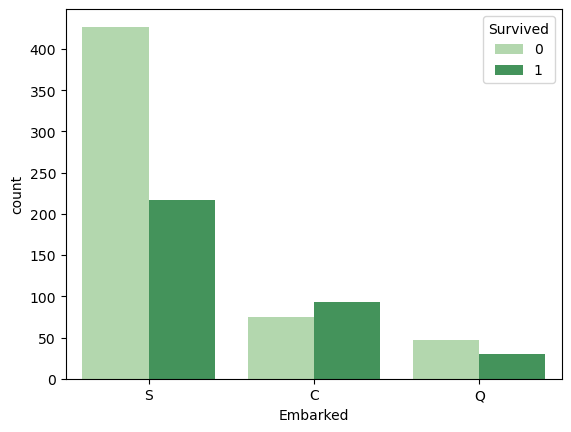

In [31]:
sns.countplot(data= train_df, x='Embarked',hue='Survived', palette='Greens');

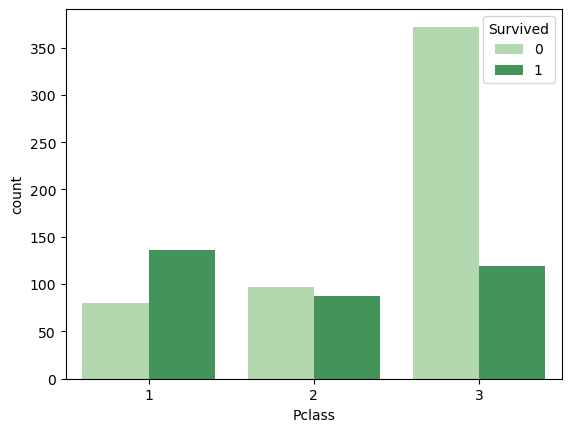

In [32]:
sns.countplot(data= train_df, x='Pclass',hue='Survived', palette='Greens');

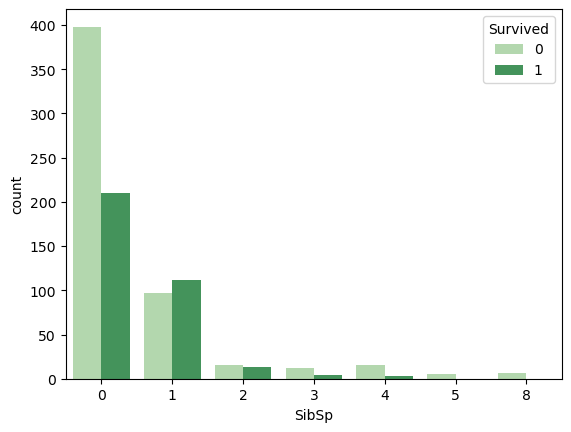

In [33]:
sns.countplot(data= train_df, x='SibSp',hue='Survived', palette='Greens');

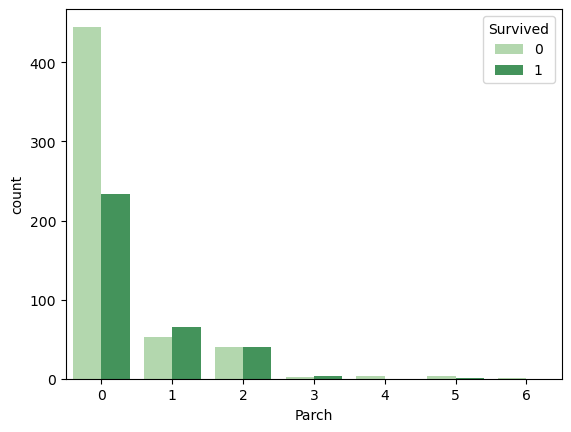

In [34]:
sns.countplot(data= train_df, x='Parch',hue='Survived', palette='Greens');

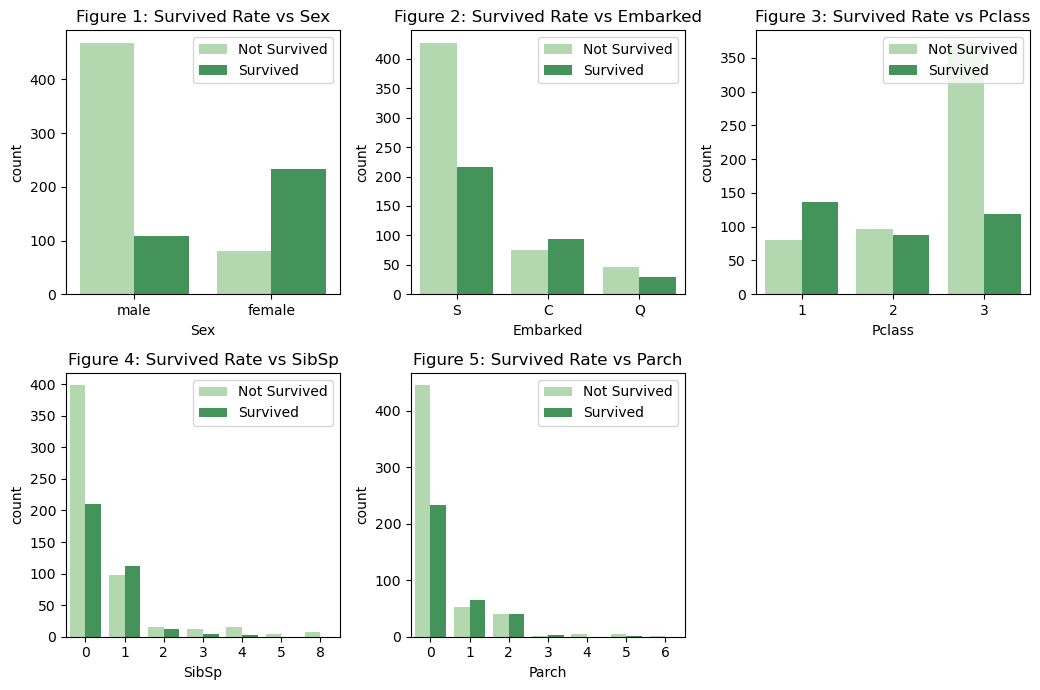

In [35]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_cols = 3
n_rows = 2

fig,ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='Survived',
                          palette='Greens',
                          ax=ax_i)
            
            ax_i.set_title(f'Figure {i+1}: Survived Rate vs {cols[i]}')
            ax_i.legend(title='', loc='upper right', labels=['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

## EDA for Numerical Features
* Numerical Feature: `Age`, `Fare`


### Age

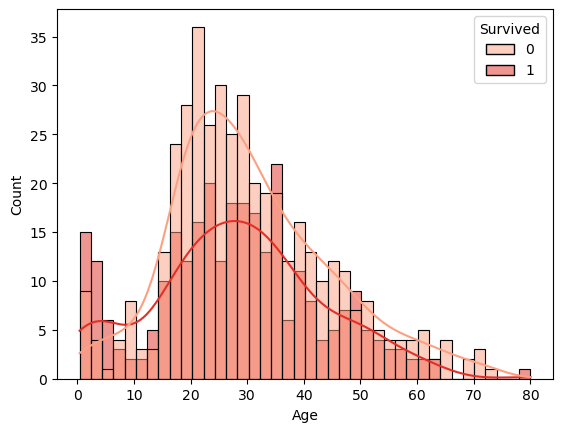

In [37]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins=40, palette='Reds', kde=True);

+ Majority passengers were from 18-40 ages
+ children had more chance to survive than other ages

## Fare

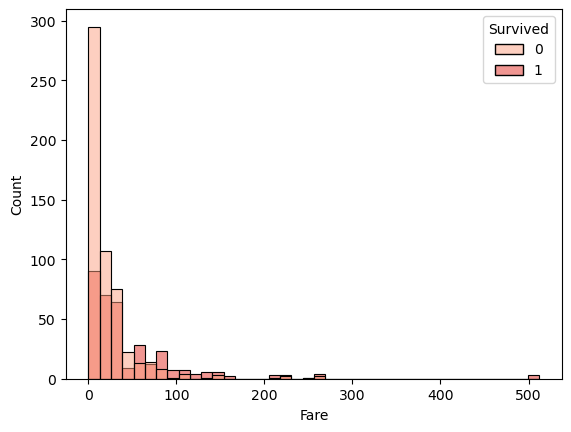

In [40]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=40, palette='Reds');

In [41]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

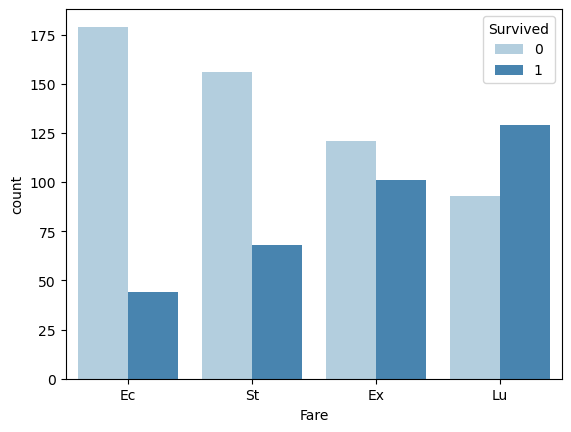

In [42]:
fare_cat = ['Ec', 'St', 'Ex', 'Lu']
quartitle_data = pd.qcut(train_df['Fare'], 4, labels=fare_cat)

sns.countplot(x=quartitle_data, hue=train_df['Survived'], palette='Blues');

# P3
## Feature Engineering & Data Wrangling

In [44]:
import re

def extract_title(name):
    p= re.compile(r',([\w\s]+)\.')
    return p.search(name).groups(1)[0].strip()

train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name))

In [45]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [46]:
test_df['Title']=test_df['Name'].apply(lambda name: extract_title(name))

In [47]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [48]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else: 
        return 'Orther'

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

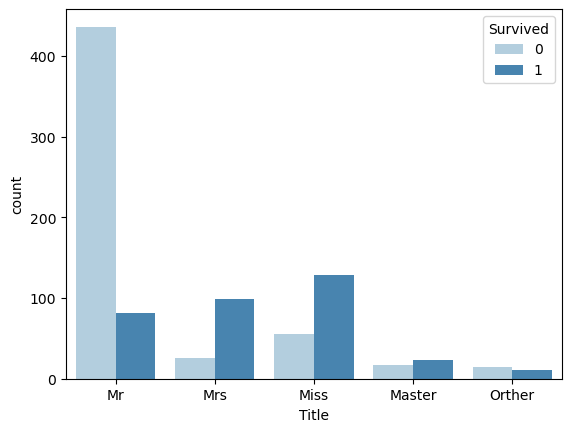

In [49]:
sns.countplot(data=train_df, x='Title', hue='Survived', palette='Blues');

## Family
* `SibSp`, `Parch`

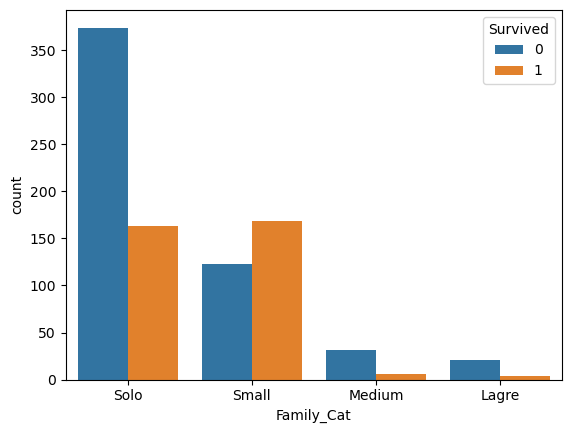

In [51]:
train_df['Family_Size'] = train_df['SibSp'].astype('int')+train_df['Parch'].astype('int')+1
test_df['Family_Size'] = test_df['SibSp'].astype('int')+test_df['Parch'].astype('int')+1

# 0->1: Solo
# 1->4: Small
# 4->6: Medium
# 6->20: Lagre
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'],
                                bins=(0,1,4,6,20),
                                labels=['Solo', 'Small', 'Medium', 'Lagre'])

test_df['Family_Cat'] = pd.cut(test_df['Family_Size'],
                                bins=(0,1,4,6,20),
                                labels=['Solo', 'Small', 'Medium', 'Lagre'])

sns.countplot(data=train_df, x='Family_Cat', hue='Survived');

## Data Wrangling

In [53]:
num_feature = ['Age', 'Fare']
cat_feature = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

feature_cols = num_feature + cat_feature
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [54]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f'{col} has {missing_count + 100/n_rows: .2f}% missing values')

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Age has  177.11% missing values
Embarked has  2.11% missing values
Age has  86.24% missing values
Fare has  1.24% missing values


### Filling missing values
#### Age
* Filling missing values with `median` of whole dataset

In [56]:
print(train_df['Age'].dtype)

float64


In [57]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].agg(np.median)
age_by_sex_pclass

C:\Users\Admin\AppData\Local\Temp\ipykernel_16848\425165685.py:1: FutureWarning: The provided callable <function median at 0x0000018FF054B100> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].agg(np.median)


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [106]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
train_df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    21.5
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [110]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age']

C:\Users\Admin\AppData\Local\Temp\ipykernel_16848\1729928372.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


PassengerId
892     34.5
893     47.0
894     62.0
895     27.0
896     22.0
        ... 
1305    24.0
1306    39.0
1307    38.5
1308    24.0
1309    24.0
Name: Age, Length: 418, dtype: float64

In [112]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Embarked has  2.11% missing values
Fare has  1.24% missing values


In [114]:
x = train_df[feature_cols]
y = train_df['Survived']

In [116]:
X_test = test_df[feature_cols]

In [120]:
#Preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'igonre'))
])

In [126]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_feature),
    ('cat', cat_transformer, cat_feature)
])

In [136]:
preprocessor.fit(x)

InvalidParameterError: The 'handle_unknown' parameter of OneHotEncoder must be a str among {'ignore', 'error', 'infrequent_if_exist'}. Got 'igonre' instead.